# Multilayer Perceptrons

## 1. Hidden Layers 

Try to use deep networks instead of a single-hidden network

## 2. Activation Functions

ReLU Function 
$$\operatorname{ReLU}(x) = \max(x, 0).$$

In [1]:
import torch
from d2l import torch as d2l

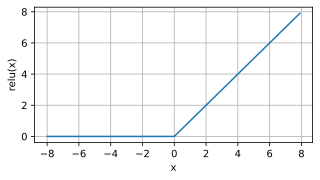

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5)) # detach.() https://blog.csdn.net/qq_27825451/article/details/95498211?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.control&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.control

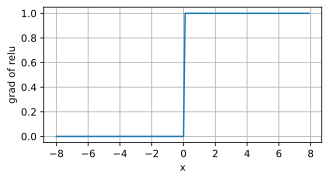

In [3]:
# the derivative of the ReLU function
y.backward(torch.ones_like(y), retain_graph=True)# grad_tensor https://zhuanlan.zhihu.com/p/83172023
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

Parameterized ReLU
$$\operatorname{pReLU}(x) = \max(0,x) + \alpha \min(0,x)$$

Sigmoid Function
$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

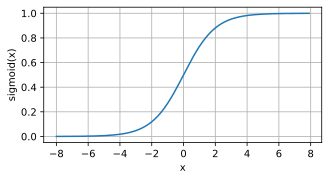

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

The derivative of the sigmoid function is given by the following equation:

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$


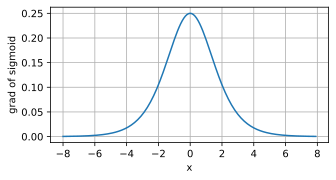

In [5]:
# the derivative of the Sigmoid function
x.grad.zero_()
y.backward(torch.ones_like(y), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

Tanh Function
$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

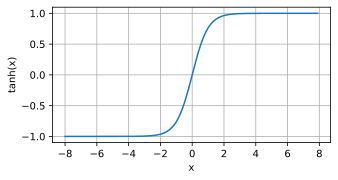

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

Note:
1. When inputs -> 0, tanh function approches a linear function
2. point symmetry

The derivative of the tanh function is:

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

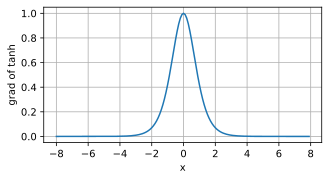

In [7]:
x.grad.zero_()
y.backward(torch.ones_like(y), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

# Implementation of Multilayer Perceptrons from Scratch 

In [8]:
import torch
from torch import nn
from d2l import torch as d2l

In [9]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [10]:
num_inputs, num_hiddens, num_outputs = 784, 256, 10

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [11]:
# implement the ReLU function
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [12]:
# implement model
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X @ W1 + b1)
    return (H @ W2 + b2)

In [13]:
loss = nn.CrossEntropyLoss()

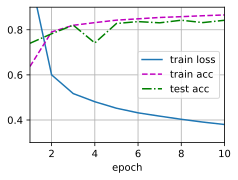

In [14]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

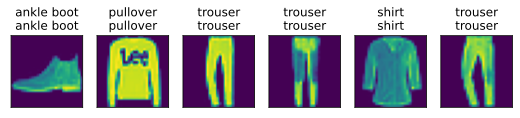

In [15]:
d2l.predict_ch3(net, test_iter)

# Concise Implementation of MLPs 

In [16]:
import torch
from torch import nn
from d2l import torch as d2l

In [17]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
        
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [18]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

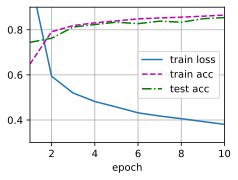

In [19]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

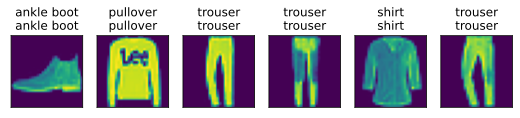

In [20]:
d2l.predict_ch3(net, test_iter)

# Model Selection, Underfitting, and Overfitting

The training error is the error of our model as calculated on the training dataset, while generalization error is the expectation of our modelʼs error were we to apply it to an infinite stream of additional data examples drawn from the same underlying data distri- bution as our original sample.

A few factors that tend to influence the generalizability of a model class:
1. The number of tunable parameters. When the number of tunable parameters, sometimes called the degrees of freedom, is large, models tend to be more susceptible to overfitting.
2. Thevaluestakenbytheparameters.Whenweightscantakeawiderrangeofvalues,models can be more susceptible to overfitting.
3. The number of training examples. It is trivially easy to overfit a dataset containing only one or two examples even if your model is simple. But overfitting a dataset with millions of examples requires an extremely flexible model.

Model Selection---Split data into three part: training dataset, test dataset, and validation dataset

K-Fold Cross-Validation---When training data is scarce, we split training dataset into K non-overlapping subsets. 
Then model training and validation are executed K times, each time training on K − 1 subsets and validating on a different subset (the one not used for training in that round). Finally, the training and validation errors are estimated by averaging over the results from the K experiments.

Underfitting or Overfitting?
1. Model complexity 
2. Dataset size

**Summary:**
1. Since the generalization error cannot be estimated based on the training error, simply minimizing the training error will not necessarily mean a reduction in the generalization error. Machine learning models need to be careful to safeguard against overfitting so as to minimize the generalization error.
2. A validation set can be used for model selection, provided that it is not used too liberally.
3. Underfitting means that a model is not able to reduce the training error. When training error is much lower than validation error, there is overfitting.
4. We should choose an appropriately complex model and avoid using insufficient training samples.

# Weight Decay($L_2$ Regularization)

Loss function
$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

Now we optimize the following function
$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2,$$
where $\lambda$ is a hyperparameter.

$L_1$ Norm or $L_2$ Norm?
1. $L_2$-regularized linear models constitute the classic ridge regression algorithm, $L_1$-regularized linear regression is a similarly fundamental model in statistics, which is popularly known as lasso regression.
2. One reason to work with the $L_2$ norm is that it places an outsize penalty on large components of the weight vector. This biases our learning algorithm towards models that distribute weight evenly across a larger number of features. In practice, this might make them more robust to measurement error in a single variable. By contrast, $L_1$ penalties lead to models that concentrate weights on a small set of features by clearing the other weights to zero. This is called feature selection, which may be desirable for other reasons.

The minibatch stochastic gradient descent updates for $L_2$-regularized regression follow:
$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$
The optimization algorithm decays the weight at each step of training.  
Smaller values of $\lambda$ correspond to less constrained $\mathbf{w}$, whereas larger values of $\lambda$ constrain $\mathbf{w}$ more considerably.


High-Dimensional Linear Regression
First, we [**generate some data as before**]

$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).$$

We choose our label to be a linear function of our inputs,
corrupted by Gaussian noise with zero mean and standard deviation 0.01.
To make the effects of overfitting pronounced,
we can increase the dimensionality of our problem to $d = 200$
and work with a small training set containing only 20 examples.


In [21]:
import torch
from torch import nn
from d2l import torch as d2l

In [22]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [23]:
# initializing model parameters
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [24]:
# defining L_2 Norm penalty
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [25]:
# defining the training loop
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', torch.norm(w).item())

L2 norm of w: 12.98847484588623


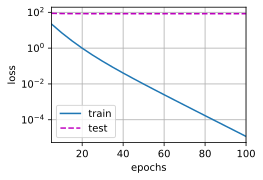

In [26]:
# without using weight decay
train(lambd=0)

L2 norm of w: 0.3792787194252014


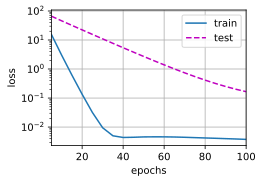

In [27]:
# using weight decay
train(lambd=3)

In [28]:
# Concise implementation 
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    # The bias parameter has not decayed
    trainer = torch.optim.SGD([{
        "params": net[0].weight,'weight_decay': wd}, {
        "params": net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', net[0].weight.norm().item())

L2 norm of w: 12.542230606079102


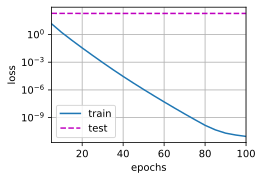

In [29]:
train_concise(0)

L2 norm of w: 0.44184601306915283


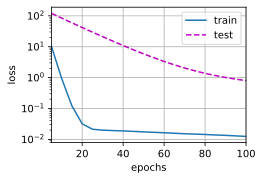

In [30]:
train_concise(3)

**Summary:**
1. Regularization is a common method for dealing with overfitting. It adds a penalty term to the loss function on the training set to reduce the complexity of the learned model.
2. One particular choice for keeping the model simple is weight decay using an L2 penalty. This leads to weight decay in the update steps of the learning algorithm.
3. The weight decay functionality is provided in optimizers from deep learning frameworks.
4. Different sets of parameters can have different update behaviors within the same training loop.

# Dropout 

**bias-variance tradeoff:**  
high bias -- underfitting  
high variance -- overfitting

**Dropout**, involves injecting noise while computing each internal layer during forward propagation, and it has become a standard technique for training neural networks.   
The method is called dropout because we literally drop out some neurons during training. Throughout training, on each iteration, standard dropout consists of zeroing out some fraction of the nodes in each layer before calculating the subsequent layer.

*Core Idea:* **Remain the expectation unchanged.**  
Crucially, note that in the **predict function** we are not dropping anymore, but we are performing a scaling of both hidden layer outputs by $p$. This is important because at test time all neurons see all their inputs, so we want the outputs of neurons at test time to be identical to their expected outputs at training time. For example, in case of $p=0.5$, the neurons must halve their outputs at test time to have the same output as they had during training time (in expectation). To see this, consider an output of a neuron $x$ (before dropout). With dropout, the expected output from this neuron will become $px+(1−p)0$, because the neuron’s output will be set to zero with probability $1−p$. At test time, when we keep the neuron always active, we must adjust $x→px$ to keep the same expected output. It can also be shown that performing this attenuation at test time can be related to the process of iterating over all the possible binary masks (and therefore all the exponentially many sub-networks) and computing their ensemble prediction.

The undesirable property of the scheme presented above is that we must scale the activations by $p$ at test time. Since test-time performance is so critical, it is always preferable to use **inverted dropout**, which performs the scaling at train time, leaving the forward pass at test time untouched. Additionally, this has the appealing property that the prediction code can remain untouched when you decide to tweak where you apply dropout, or if at all.

In [31]:
# implementation from scratch
import torch
from torch import nn
from d2l import torch as d2l

In [32]:
# drop out elements in the tensor input X with probability dropout, 
# then rescale the remainder by dividing the survivors by 1-dropout.
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1:
        return torch.zeros_like(X)
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [33]:
# test dropout_layer( , ) 
X = torch.arange(16, dtype=torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 1))
print(dropout_layer(X, 0))
print(dropout_layer(X, 0.5))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  4.,  0.,  8., 10., 12.,  0.],
        [16.,  0., 20., 22.,  0., 26.,  0., 30.]])


In [34]:
# work with Fashion-MNIST dataset, define model parameters
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

**When defining the model:**
Trend -- set a lower dropout probability closer to the input layer

In [35]:
# defining the model
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2, is_training=True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()
        
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # Use the dropout only while training the model
        if self.training == True:
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out
    
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

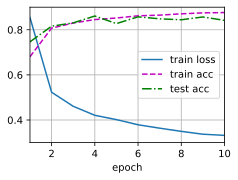

In [36]:
# Training and testing
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [37]:
# concise implementation
net = nn.Sequential(
    nn.Flatten(), nn.Linear(784, 256), nn.ReLU(),
    nn.Dropout(dropout1), nn.Linear(256, 256), nn.ReLU(),
    nn.Dropout(dropout2), nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
        
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

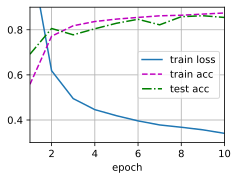

In [38]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

**Summary:**
1. Beyond controlling the number of dimensions and the size of the weight vector, dropout is yet another tool to avoid overfitting. Often they are used jointly.
2. Dropout replaces an activation $h$ with a random variable with expected value $h$.
3. Dropout is only used during training.


# Forward Propagation, Backward Propagation, and Computational Graphs 

**Forward propagation** (or forward pass) refers to the calculation and storage of intermediate variables (including outputs) for a neural network in order from the input layer to the output layer. 

**Backward propagation** refers to the method of calculating the gradient of neural network parameters.  
*core idea: chain rule*  
Note: In this algorithm, any intermediate variables will be stored.  

**Summary:**
1. Forward propagation sequentially calculates and stores intermediate variables within the computational graph defined by the neural network. It proceeds from the input to the output layer.
2. Backpropagation sequentially calculates and stores the gradients of intermediate variables and parameters within the neural network in the reversed order.
3. When training deep learning models, forward propagation and back propagation are interdependent.
4. Training requires significantly more memory than prediction.

# Numerical Stability and Initialization 

Which function we choose and how we initialize parameters can determine how quickly our optimization algorithm converges. Poor choices here can cause us to encounter exploding or vanishing gradients while training.  

**Vanishing Gradients**  
One frequent culprit is the choice of the activation function $\sigma$ that appended following each layer's linear operations.

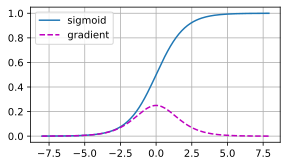

In [39]:
import torch 
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()], legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

The sigmoidʼs gradient vanishes both when its inputs are large and when they are small.  
In deep network training, we use ReLU more.


**Exploding Gradients**  

In [44]:
M = torch.normal(0, 1, size=(4, 4))
print('a single matrix \n', M)
for i in range(100):
    M = torch.mm(M, torch.normal(0, 1, size=(4, 4)))
    
print('after multiplying 100 matrices \n', M)

a single matrix 
 tensor([[ 1.5004, -0.7406,  0.5039, -1.8521],
        [ 1.3599,  1.2089, -0.7699,  0.4413],
        [ 0.3871,  0.9462,  0.5856,  0.3703],
        [ 0.9933,  1.2435, -0.8562, -0.0356]])
after multiplying 100 matrices 
 tensor([[ 1.6118e+24,  1.3770e+24, -2.9619e+24, -1.8570e+24],
        [ 1.0102e+24,  8.6299e+23, -1.8563e+24, -1.1639e+24],
        [ 1.5797e+23,  1.3492e+23, -2.9024e+23, -1.8200e+23],
        [ 5.8936e+23,  5.0345e+23, -1.0830e+24, -6.7901e+23]])


**The Symmetry**  

*Note:* **Parameter Initialization** is a choice to address or mitigate these issues.

**Summary**
1. Vanishing and exploding gradients are common issues in deep networks. Great care in parameter initialization is required to ensure that gradients and parameters remain well controlled.
2. Initialization heuristics are needed to ensure that the initial gradients are neither too large nor too small.
3. ReLU activation functions mitigate the vanishing gradient problem. This can accelerate convergence.
4. Random initialization is key to ensure that symmetry is broken before optimization.
5. Xavier initialization suggests that, for each layer, variance of any output is not affected by the number of inputs, and variance of any gradient is not affected by the number of outputs.